In [2]:
import scarlink as sl
import scarlink.src.visualization as scv
from scarlink.src.read_model import read_model
import matplotlib.pyplot as plt
import glob
import h5py
import pandas
import os
import seaborn
from scipy import stats
from compare_corrs import plot_compare_gsm_corr, plot_compare_dorc_corr

#### Save ArchR gene score matrices in .mtx files

Use the Seurat and ArchR objects that were used as inputs for SCARlink to generate the gene score matrices.

In [3]:
# make tmp directory
os.makedirs("./tmp/", exist_ok=True)

In [4]:
# PBMC
!Rscript get_gene_score.R pbmc_input/scrna.rds pbmc_input/scatac ./tmp/pbmc_


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [5]:
# BMMC
!Rscript get_gene_score.R bmmc_median/scrna.rds bmmc_median/scatac ./tmp/bmmc_


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [6]:
# Cortex
!Rscript get_gene_score.R human_cortex_input/scrna.rds human_cortex_input/scatac ./tmp/human_cortex_


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

#### Plot Spearman correlations for SCARlink and ArchR gene score matrix predictions

Number of genes: (1250, 6)


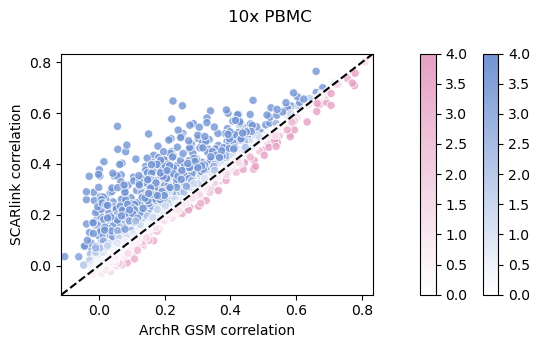

SCARlink better: 713 0.5704 (1250, 7)
ArchR better: 102 0.0816 (1250, 7)
Wilcoxon p-val: 8.354421666371218e-114


In [7]:
# PBMC
pbmc_scarlink_out = "./pbmc_all_out_10k"
pbmc_out_prefix = "./tmp/pbmc_" # same as the one used to run get_gene_score.R above
plot_compare_gsm_corr(pbmc_scarlink_out, pbmc_out_prefix, "10x PBMC")

Number of genes: (1655, 6)


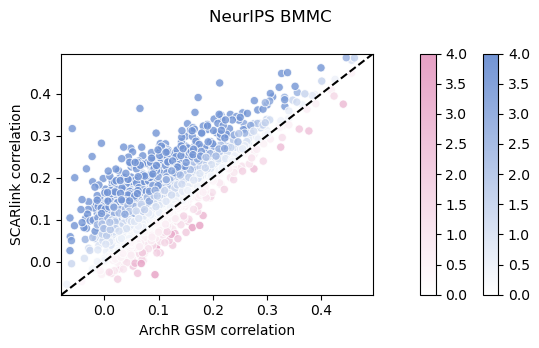

SCARlink better: 941 0.5685800604229607 (1655, 7)
ArchR better: 63 0.038066465256797584 (1655, 7)
Wilcoxon p-val: 3.248502848591392e-200


In [8]:
# BMMC
bmmc_scarlink_out = "./bmmc_all_out_10k"
bmmc_out_prefix = "./tmp/bmmc_" # same as the one used to run get_gene_score.R above
plot_compare_gsm_corr(bmmc_scarlink_out, bmmc_out_prefix, "NeurIPS BMMC")

Number of genes: (1201, 6)


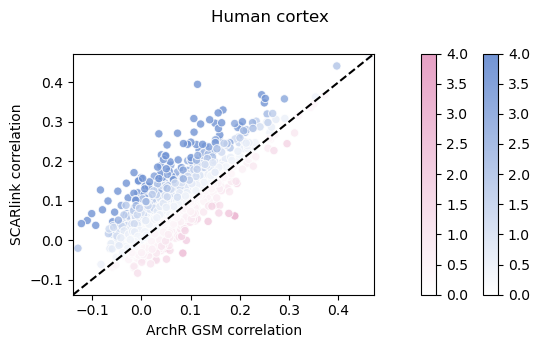

SCARlink better: 293 0.24396336386344714 (1201, 7)
ArchR better: 20 0.01665278934221482 (1201, 7)
Wilcoxon p-val: 1.1557125715556437e-61


In [9]:
# Cortex
cortex_scarlink_out = "./human_cortex_all_out_10k"
cortex_out_prefix = "./tmp/human_cortex_" # same as the one used to run get_gene_score.R above
plot_compare_gsm_corr(cortex_scarlink_out, cortex_out_prefix, "Human cortex")

## DORC correlation

ArchR object should have a peak matrix. We used the peak coordinates in file `GSM4156597_skin.late.anagen.peaks.bed.gz` from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE140203.

In [10]:
# Mouse skin
!Rscript get_peak_matrix.R mouse_skin_all_input/mouse_skin_scrna.rds mouse_skin_all_input/mouse_skin_scatac ./tmp/mouse_skin_


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [11]:
# Download DORC peak gene associations
!wget https://ars.els-cdn.com/content/image/1-s2.0-S0092867420312538-mmc4.csv -O ./tmp/mouse_skin_peak_gene_associations.csv

--2024-01-09 18:16:29--  https://ars.els-cdn.com/content/image/1-s2.0-S0092867420312538-mmc4.csv
Resolving ars.els-cdn.com (ars.els-cdn.com)... 172.64.155.214, 104.18.32.42, 2606:4700:4400::6812:202a, ...
Connecting to ars.els-cdn.com (ars.els-cdn.com)|172.64.155.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7438532 (7.1M) [text/csv]
Saving to: ‘./tmp/mouse_skin_peak_gene_associations.csv’

100%[======================================>] 7,438,532   --.-K/s   in 0.05s   

2024-01-09 18:16:29 (134 MB/s) - ‘./tmp/mouse_skin_peak_gene_associations.csv’ saved [7438532/7438532]



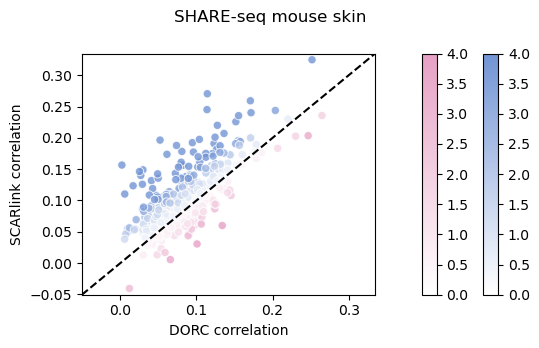

SCARlink better: 146 0.38421052631578945 (380, 6)
DORC better: 35 0.09210526315789473 (380, 6)
Wilcoxon p-val: 3.12614216546986e-18


In [12]:
mouse_skin_scarlink_out = "./mouse_skin_all_out_10k"
mouse_skin_out_prefix = "./tmp/mouse_skin_" # same as the one used to run get_peak_matrix.R above
plot_compare_dorc_corr(mouse_skin_scarlink_out, mouse_skin_out_prefix, "SHARE-seq mouse_skin")

## Plot SCARlink output

Saved as ./pbmc_all_out_10k/scarlink_plots/ZEB2.png


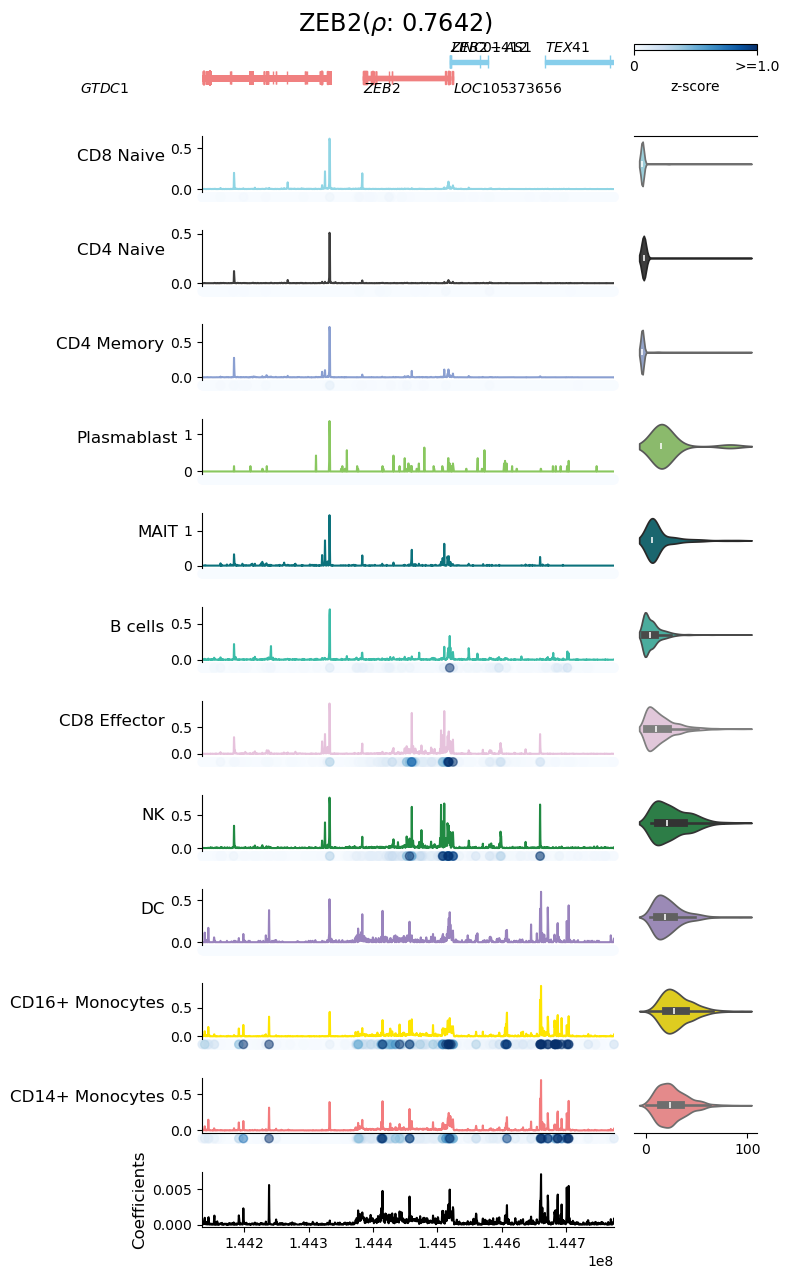

In [14]:
scarlink_out_pbmc = scv.get_scarlink_output(pbmc_scarlink_out)
scv.plot_scarlink_output(scarlink_out_pbmc, genes=['ZEB2'], celltype='celltype', figsize=(8, 13), 
                        show_yticks=True)
plt.tight_layout()

Saved as ./mouse_skin_all_out_10k/scarlink_plots/Lef1.png


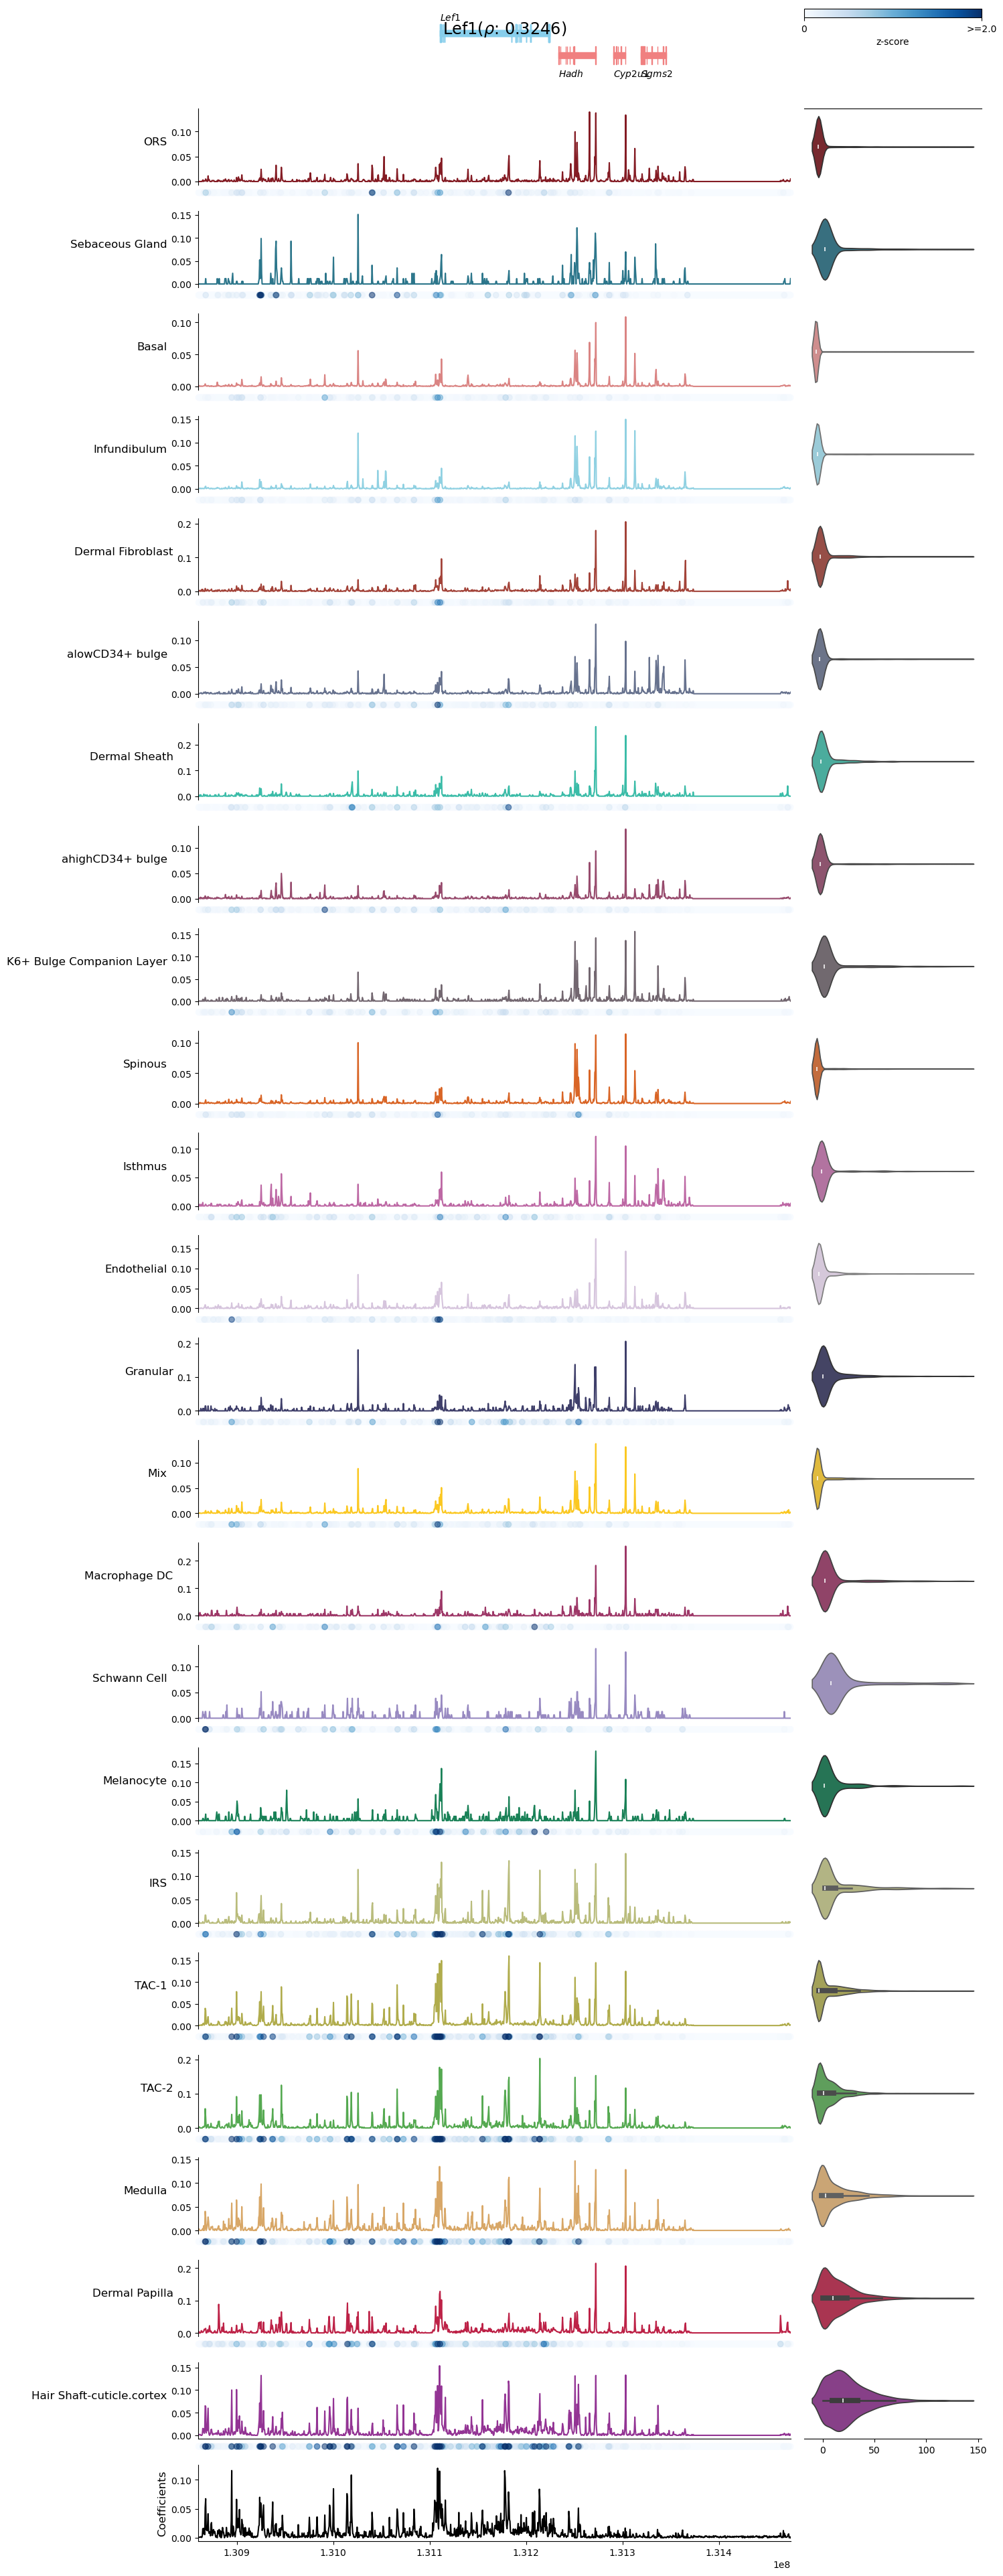

In [21]:
scarlink_out_mouse_skin = scv.get_scarlink_output(mouse_skin_scarlink_out)
scv.plot_scarlink_output(scarlink_out_mouse_skin, genes=['Lef1'], celltype='celltype', figsize=(15, 39), 
                        show_yticks=True)
plt.tight_layout()